# 11. Lebesgue vs. Riemann Integration

**Goal:** Compare the two integration theories on key examples.

**Key difference:** Riemann partitions the *domain*, Lebesgue partitions the *range*.
This makes Lebesgue integration more powerful — it can integrate functions that Riemann cannot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Dirichlet Function

$f(x) = \mathbf{1}_\mathbb{Q}(x)$: equals 1 on rationals, 0 on irrationals.

- **Riemann:** Every interval contains both rationals and irrationals, so upper sum = 1, lower sum = 0. NOT Riemann integrable.
- **Lebesgue:** $\mathbb{Q}$ has measure 0, so $\int f = 0$.

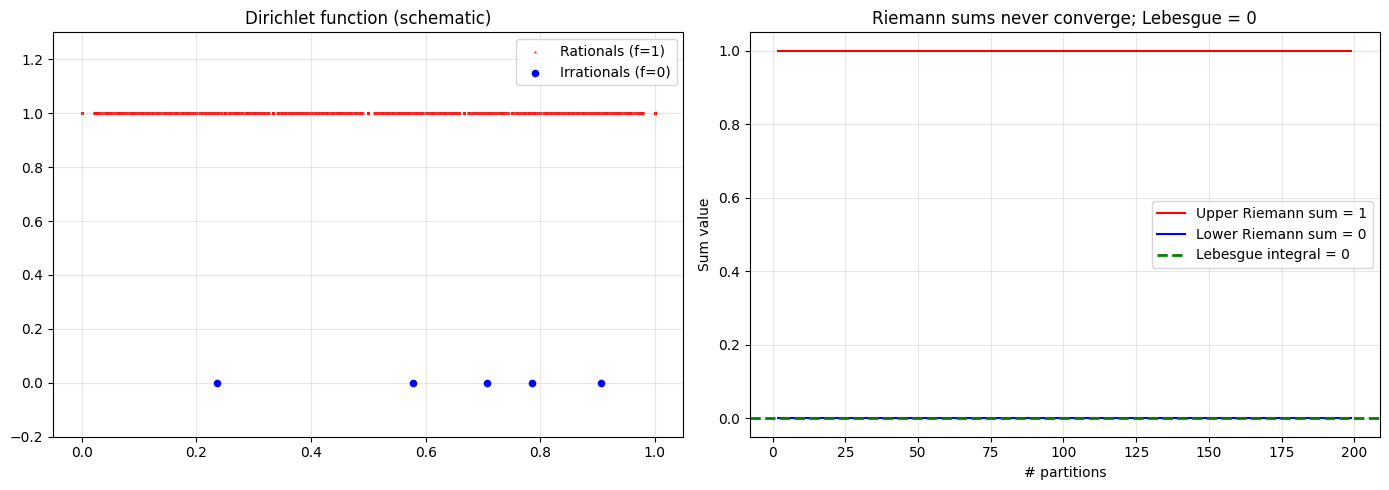

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Approximate: plot rationals p/q for small q
ax = axes[0]
rationals_x, rationals_y = [], []
for q in range(1, 50):
    for p in range(q+1):
        r = p/q
        if 0 <= r <= 1:
            rationals_x.append(r)
            rationals_y.append(1)
ax.scatter(rationals_x, rationals_y, s=1, c='red', alpha=0.5, label='Rationals (f=1)')
irr = np.array([np.sqrt(2)/2, np.pi/4, np.e/3, 1/np.sqrt(3), np.sqrt(5)-2])
irr = irr[(irr >= 0) & (irr <= 1)]
ax.scatter(irr, np.zeros(len(irr)), s=20, c='blue', zorder=5, label='Irrationals (f=0)')
ax.set_ylim(-0.2, 1.3); ax.set_title('Dirichlet function (schematic)', fontsize=12)
ax.legend(); ax.grid(True, alpha=0.3)

# Riemann sums
ax = axes[1]
partition_sizes = np.arange(2, 200)
upper_sums = np.ones(len(partition_sizes))
lower_sums = np.zeros(len(partition_sizes))
ax.plot(partition_sizes, upper_sums, 'r-', label='Upper Riemann sum = 1')
ax.plot(partition_sizes, lower_sums, 'b-', label='Lower Riemann sum = 0')
ax.axhline(0, color='green', linestyle='--', linewidth=2, label='Lebesgue integral = 0')
ax.set_xlabel('# partitions'); ax.set_ylabel('Sum value')
ax.set_title('Riemann sums never converge; Lebesgue = 0', fontsize=12)
ax.legend(); ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Thomae's Function (Popcorn Function)

$f(p/q) = 1/q$ (reduced form), $f(x) = 0$ for irrational $x$.
Discontinuous at every rational, continuous at every irrational.
Riemann integrable! (Discontinuities form a measure-zero set.)

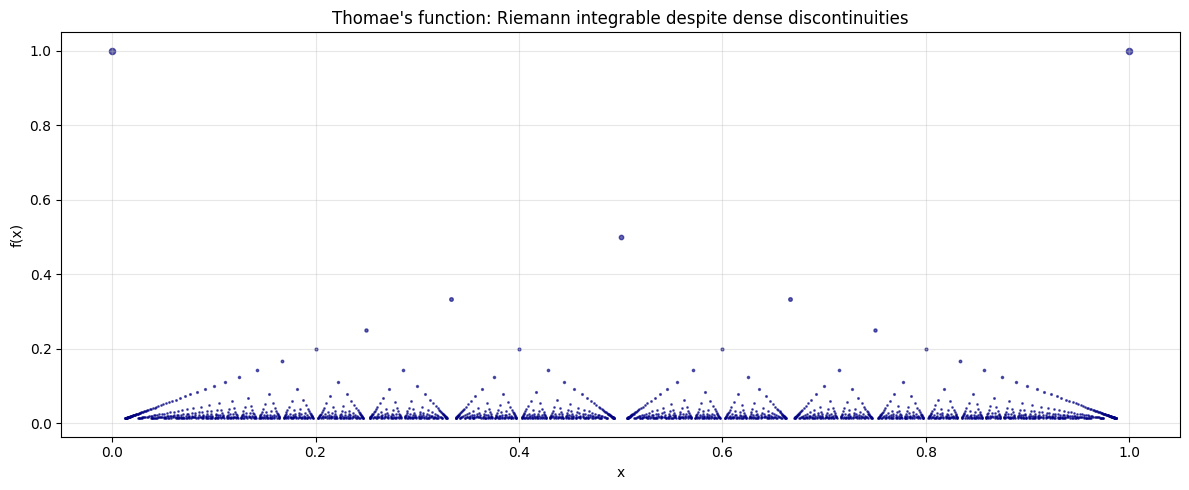

In [3]:
from math import gcd
fig, ax = plt.subplots(figsize=(12, 5))
for q in range(1, 80):
    for p in range(q+1):
        if gcd(p, q) == 1:
            ax.scatter(p/q, 1/q, s=max(1, 20/q), c='navy', alpha=0.6)
ax.set_xlabel('x'); ax.set_ylabel('f(x)')
ax.set_title("Thomae's function: Riemann integrable despite dense discontinuities", fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Domain vs. Range Partitioning

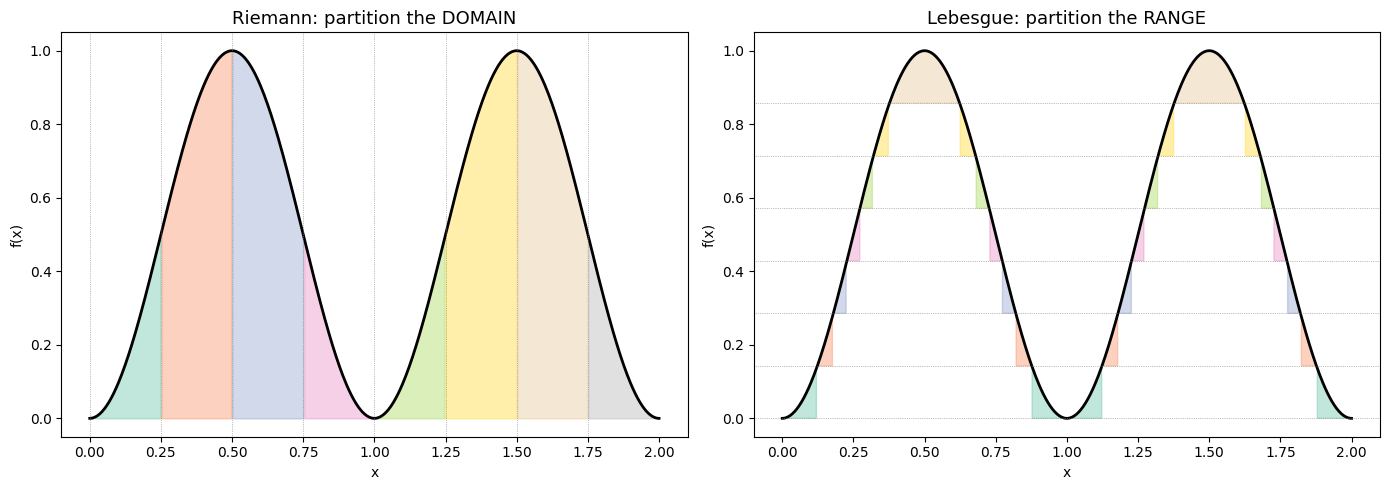

In [4]:
# Illustrate Riemann (vertical slices) vs Lebesgue (horizontal slices)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
x = np.linspace(0, 2, 500)
y = np.sin(x*np.pi)**2

ax1.plot(x, y, 'k-', linewidth=2)
n_parts = 8
for i in range(n_parts):
    a, b = i*2/n_parts, (i+1)*2/n_parts
    mask = (x >= a) & (x <= b)
    ax1.fill_between(x[mask], 0, y[mask], alpha=0.4, color=plt.cm.Set2(i/n_parts))
    ax1.axvline(a, color='gray', linewidth=0.5, linestyle=':')
ax1.set_title('Riemann: partition the DOMAIN', fontsize=13)
ax1.set_xlabel('x'); ax1.set_ylabel('f(x)')

ax2.plot(x, y, 'k-', linewidth=2)
levels = np.linspace(0, 1, 8)
for i in range(len(levels)-1):
    mask = (y >= levels[i]) & (y < levels[i+1])
    ax2.fill_between(x, levels[i], np.minimum(y, levels[i+1]),
                     where=mask, alpha=0.4, color=plt.cm.Set2(i/len(levels)))
    ax2.axhline(levels[i], color='gray', linewidth=0.5, linestyle=':')
ax2.set_title('Lebesgue: partition the RANGE', fontsize=13)
ax2.set_xlabel('x'); ax2.set_ylabel('f(x)')
plt.tight_layout()
plt.show()

## Key Takeaways

1. **Lebesgue is strictly more general** than Riemann: every Riemann integrable function is Lebesgue integrable (with same value), but not vice versa.
2. **Dirichlet function:** Lebesgue integrable (integral=0) but not Riemann integrable.
3. **Thomae's function:** Riemann integrable despite dense discontinuities (Lebesgue's criterion: discontinuities have measure 0).
4. The conceptual shift: Riemann partitions the domain, Lebesgue partitions the range.